## Exploring the Data

In [4]:
import pandas as pd

In [6]:
rentals = pd.read_json('train_data.json')

In [7]:
rentals.head()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,...,index,interest_level,latitude,level_0,listing_id,longitude,manager_id,photos,price,street_address
0,0,0,0,0,0,0,0,0,0,0,...,10,medium,40.7145,0,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
1,0,1,0,0,0,1,1,1,0,1,...,10000,low,40.7947,1,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
10,0,0,0,0,1,0,1,1,0,1,...,122571,low,40.7695,10005,6878679,-73.9603,781c05e464ce94eaa436401d07f2a6cc,[https://photos.renthop.com/2/6878679_b53fe0cc...,5200,200 East 72nd Street
100,0,0,0,0,0,0,0,0,0,0,...,122816,low,40.7845,10104,6923817,-73.9760,096ce7507f4f3678b32780d20bfab49f,[],3995,150 West 82nd Street
1000,0,1,0,0,1,0,1,1,0,0,...,13249,low,40.7771,11036,7097593,-73.9505,7b392b11d691f65a71e58a3f76aaf04e,[https://photos.renthop.com/2/7097593_b437c54a...,2300,336 E 86 St.


Just looking at the first five rows of data, we can see that there are 42 columns, or features. There is a mix of qualitative and quantitative variables. Different columns may have data that are binary, discrete, continuous, categorical, etc.  

In [8]:
rentals.describe()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,...,Terrace,Wheelchair Access,bathrooms,bedrooms,index,latitude,level_0,listing_id,longitude,price
count,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,...,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,4.191800e+04,41918.000000,4.191800e+04
mean,0.061239,0.478052,0.026170,0.104299,0.413068,0.447373,0.422515,0.524953,0.044372,0.270123,...,0.046376,0.027745,1.211950,1.537621,62028.264612,40.742705,24646.531800,7.024133e+06,-73.957629,3.829015e+03
std,0.239770,0.499524,0.159643,0.305652,0.492391,0.497229,0.493966,0.499383,0.205923,0.444028,...,0.210301,0.164242,0.502177,1.114057,35769.640616,0.600334,14248.642743,1.260963e+05,1.110224,2.334703e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,31064.250000,40.728300,12325.250000,6.916416e+06,-73.991700,2.495000e+03
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,61901.500000,40.751800,24692.500000,7.021090e+06,-73.977900,3.150000e+03
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,2.000000,93043.250000,40.774300,36942.750000,7.128524e+06,-73.954700,4.100000e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,10.000000,8.000000,124009.000000,44.603800,49350.000000,7.753784e+06,0.000000,4.490000e+06


Looking at this statistical summary:
- For most of the data, the count is consistent, suggesting that there is not that much missing data.
- For many of the columns, the values are binary. 
- Also notice that there are only 33 columns, indicating that some of these variables, most likely text, could not be included in the statistical summary. An example of this is `street_address`. 

Note that the data needs some pre-processing. We will want to substitute columns of text with numerical values for this analysis. 

### Substituting categories with numerical values

In [1]:
# TODO add section 
'''
Identify columns to drop 
Identify columns to replace 
'''

'\nIdentify columns to drop \nIdentify columns to replace \n'

### Visualizing correlations

In [8]:
corr = rentals.corr()

In [9]:
corr.head()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,...,Terrace,Wheelchair Access,bathrooms,bedrooms,index,latitude,level_0,listing_id,longitude,price
Balcony,1.000000,0.017895,-0.028158,0.245208,0.231908,0.022130,0.162431,0.169046,-0.041507,0.128755,...,0.464583,0.038638,0.143434,0.103327,-0.007539,0.004592,0.003524,0.002470,-0.004383,0.011582
Cats Allowed,0.017895,1.000000,0.106673,-0.025945,-0.046506,0.936880,0.091194,0.034568,0.032892,0.128856,...,0.007191,0.037518,0.017855,-0.008376,-0.007526,-0.007268,-0.002388,0.002290,0.005535,0.011299
Common Outdoor Space,-0.028158,0.106673,1.000000,-0.043717,-0.085930,0.107663,0.126002,0.113751,0.033617,0.196436,...,-0.029045,-0.016774,-0.003425,0.005396,0.024723,-0.004602,0.011135,0.000063,-0.005096,-0.000422
Dining Room,0.245208,-0.025945,-0.043717,1.000000,0.355879,-0.020394,0.203796,0.201764,-0.072015,0.184223,...,0.243189,0.109159,0.246874,0.200341,-0.001756,0.006333,0.001161,-0.002370,-0.005277,0.020435
Dishwasher,0.231908,-0.046506,-0.085930,0.355879,1.000000,-0.043973,0.318889,0.349221,-0.108303,0.278991,...,0.200897,0.143250,0.172277,0.158918,0.007205,0.010546,-0.000284,-0.015015,-0.015941,0.012754


In [12]:
import seaborn as sb

In [ ]:
sb.pairplot(rentals.iloc[:,40:43])

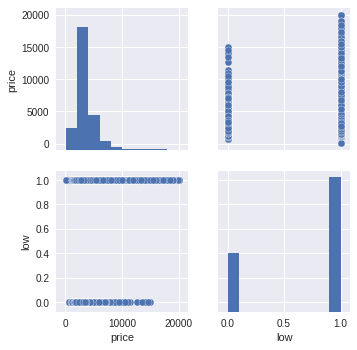

In [213]:
#b
%matplotlib inline
sb.pairplot(df.iloc[:,40:43])


In [370]:
df['binary_sum'] = df['Balcony'] + df['Cats Allowed'] + df['Common Outdoor Space'] + df['Dining Room'] + df['Dishwasher'] + df['Dogs Allowed'] + df['Doorman'] + df['Elevator'] + df['Exclusive'] + df['Fitness Center'] + df['Garden/Patio'] + df['Hardwood Floors'] + df['High Speed Internet'] + df['Laundry In Building'] + df['Laundry in Building'] + df['Laundry in Unit'] + df['Loft'] + df['New Construction'] + df['No Fee'] + df['Outdoor Space'] + df['Pre-War'] + df['Roof Deck'] + df['Swimming Pool'] + df['Terrace'] + df['Wheelchair Access']

## Random Forest Classifier

In [10]:
from sklearn.model_selection import train_test_split

In [371]:
df_train_split, df_test_split = train_test_split(df, test_size=0.3, random_state=42)
df_train_split = df_train_split.reset_index(drop = True)
df_test_split = df_test_split.reset_index(drop = True)

In [372]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators = 100, max_depth = 50, oob_score = True)
X = df_train_split[['binary_sum', 'bathrooms', 'bedrooms', 
                    'Balcony', 'Cats Allowed', 'Common Outdoor Space', 'Dining Room', 'Dishwasher',
       'Dogs Allowed', 'Doorman', 'Elevator', 'Exclusive', 'Fitness Center', 'Garden/Patio', 
       'Hardwood Floors', 'High Speed Internet', 'Laundry in Building',
       'Laundry in Unit', 'Loft', 'New Construction', 'No Fee', 'Outdoor Space', 'Pre-War',
       'Roof Deck', 'Swimming Pool', 'Terrace', 'Wheelchair Access',
       'latitude', 'longitude', 'price']].copy()
Y = df_train_split['interest_level']

In [373]:
model1 = clf.fit(X, Y)

In [374]:
X2 = df_test_split[['binary_sum', 'bathrooms', 'bedrooms', 
                    'Balcony', 'Cats Allowed', 'Common Outdoor Space', 'Dining Room', 'Dishwasher',
       'Dogs Allowed', 'Doorman', 'Elevator', 'Exclusive', 'Fitness Center', 'Garden/Patio', 
       'Hardwood Floors', 'High Speed Internet', 'Laundry in Building',
       'Laundry in Unit', 'Loft', 'New Construction', 'No Fee', 'Outdoor Space', 'Pre-War',
       'Roof Deck', 'Swimming Pool', 'Terrace', 'Wheelchair Access',
       'latitude', 'longitude', 'price']].copy()
Y2 = df_test_split['interest_level']

In [375]:
Y2_test = model1.predict(X2)

In [376]:
np.set_printoptions(threshold=np.nan)


In [377]:
t = (Y2_test == Y2).sum()
t

8958

In [378]:
t2 = len(Y2)
t2

12539

In [379]:
t/t2

0.714411037562804

In [318]:
list_of_list = df.features.tolist()

In [319]:
flat_list = [item for sublist in list_of_list for item in sublist]

In [321]:
flat_list = list(set(flat_list))

In [322]:
flat_list

['A One-of-a-Kind Full service Luxury Highrise',
 'A/C Units',
 '** NO FEE MULTI-LEVEL MANSION! * MASSIVE 3BR TRIPLEX * HUGE PRIVATE TERRACE * E50s & PARK AVE * ELEV/LNDRY BLDG **',
 'King Bedrooms',
 'Private terrace',
 'Expansive Sundeck',
 'Available  04/15/16',
 'Gas Stove',
 '** CLASSY CORNER STUDIO SUPREME * WALLS OF WINDOWS * ALL MODERN & NEW * PETS OK **',
 'electronic keycard',
 'renovated kitchen',
 'Cats on approval',
 'Laundry in Unit',
 'Roof/Sundeck',
 'Stainless Steet Appliances',
 'Brand New Renovation',
 'Transport right outside',
 'parking',
 'exclusive rental',
 'no board approval',
 '24 Hour Doorman',
 'Dishwasher/Microwave',
 'indoor swimming pool',
 'Bluetooth System',
 'duplex',
 'Rent is net effective-Gross price is $3250',
 'attended garage and service entrance',
 'near NQRMG Trains',
 'Balcony',
 'live-in super',
 'LIGHT',
 'Gramercy Park',
 'private backyard',
 'Penthouse',
 'COME LIVE THE GOOD LIFE FOR  LESS $$$$',
 'PublicOutdoor',
 'Laundry In Unit',
 'Soa

Manager ID and building ID are non unique
Try adding the binary variables together
index and level_0 are to be ignored

## Decision Tree Classifier

## Bagging Classifier

## Gradient Boosting Classifier